In [712]:
## Exploratory data analysis with real world dataset - World Energy Consumption data
# data source: https://www.kaggle.com/pralabhpoudel/world-energy-consumption

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import os
import plotly.express as px
import re
from sklearn.linear_model import LinearRegression
import opendatasets as od
pd.options.display.max_rows = 2000

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [713]:
# download_url = "https://www.kaggle.com/pralabhpoudel/world-energy-consumption"
# od.download(download_url)

In [714]:
df = pd.read_csv(r'world-energy-consumption/World Energy Consumption.csv',  encoding="utf-8")

df.count().sort_values()
df = df[["country", "year",
        "coal_consumption", "gas_consumption", "biofuel_consumption",
        "hydro_consumption", "nuclear_consumption", "oil_consumption",
        "other_renewable_consumption", "solar_consumption", "wind_consumption",
         "fossil_fuel_consumption", "renewables_consumption","gdp","population"]]

df = df.rename(columns=lambda x: re.sub("^([\w\-]+)", x.capitalize(), x))
df = df.rename(columns=lambda x: re.sub("_"," ", x))
df = df.rename(columns={"Gdp": "GDP"})

null_perc = df.isnull().sum()/len(df)*100

# print(null_perc.sort_values(ascending = False).tail(50))


df.describe()

,Year,Coal consumption,Gas consumption,Biofuel consumption,Hydro consumption,Nuclear consumption,Oil consumption,Other renewable consumption,Solar consumption,Wind consumption,Fossil fuel consumption,Renewables consumption,GDP,Population
count,17432.00,5170.00,5170.00,5626.00,4290.00,4290.00,5184.00,4290.00,4290.00,4290.00,4284.00,4290.00,10456.00,15676.00
mean,1973.09,894.62,665.60,5.83,195.80,160.18,1238.02,16.45,4.33,15.08,2737.59,239.31,541783311486.13,62862803.09
std,34.33,3800.36,2606.56,48.93,807.98,699.04,4534.64,83.18,48.55,126.67,11071.91,1042.08,4083841977485.70,379389949.53
min,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.85,0.00,196308000.00,2000.00
25%,1946.00,2.37,7.86,0.00,1.38,0.00,67.64,0.00,0.00,0.00,121.41,2.37,12538039808.00,1804069.00
50%,1983.00,31.79,51.69,0.00,13.58,0.00,154.23,0.13,0.00,0.00,296.33,17.78,42816487424.00,6523860.50
75%,2002.00,200.21,259.31,0.00,73.78,29.72,512.24,4.14,0.01,0.14,1068.12,87.52,175000000000.00,20111250.00
max,2020.00,44993.47,39292.47,1101.95,10455.13,7493.28,53619.93,1614.03,1793.00,3540.05,136761.61,18504.15,107000000000000.00,7713467904.00


In [715]:
# Percentage of null values in each column
null_perc = df.isnull().sum()/len(df)*100
print("Null percentage of each column:")
print(null_perc.sort_values(ascending = False).head(50))
# Dropping each row with null values
df = df.dropna(how='any',axis=0)
df

Null percentage of each column:
Fossil fuel consumption       75.42
Hydro consumption             75.39
Nuclear consumption           75.39
Other renewable consumption   75.39
Solar consumption             75.39
Wind consumption              75.39
Renewables consumption        75.39
Coal consumption              70.34
Gas consumption               70.34
Oil consumption               70.26
Biofuel consumption           67.73
GDP                           40.02
Population                    10.07
Country                        0.00
Year                           0.00
dtype: float64


,Country,Year,Coal consumption,Gas consumption,Biofuel consumption,Hydro consumption,Nuclear consumption,Oil consumption,Other renewable consumption,Solar consumption,Wind consumption,Fossil fuel consumption,Renewables consumption,GDP,Population
430,Algeria,1970,0.96,9.73,0.00,1.61,0.00,24.35,0.00,0.00,0.00,35.04,1.61,88245288960.00,14465000.00
431,Algeria,1971,0.27,11.05,0.00,0.92,0.00,27.44,0.00,0.00,0.00,38.76,0.92,85780643840.00,14872000.00
432,Algeria,1972,0.23,12.83,0.00,1.38,0.00,30.12,0.00,0.00,0.00,43.18,1.38,97644011520.00,15286000.00
433,Algeria,1973,0.27,17.86,0.00,2.09,0.00,32.90,0.00,0.00,0.00,51.03,2.09,106000000000.00,15710000.00
434,Algeria,1974,0.22,20.68,0.00,1.38,0.00,36.54,0.00,0.00,0.00,57.44,1.38,141000000000.00,16149000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17016,World,2012,44185.35,33220.03,764.71,9400.81,6364.20,49156.72,1109.54,259.66,1367.35,126562.10,12902.07,96600000000000.00,7125828096.00
17017,World,2013,44993.47,33766.14,817.13,9764.87,6383.71,49688.51,1187.92,356.17,1627.74,128448.12,13753.83,99300000000000.00,7210582016.00
17018,World,2014,44954.43,33994.28,875.84,9910.34,6466.97,50013.65,1274.78,503.53,1797.90,128962.37,14362.39,102000000000000.00,7295290880.00
17019,World,2015,43844.17,34780.12,907.40,9827.17,6516.07,50891.98,1361.71,649.74,2103.67,129516.27,14849.69,105000000000000.00,7379796992.00


In [716]:
# 1965 is starting year for most of countries in the dataset but for some of them there is no data,
# let's fill the data so that all countries have stats since 1970
df = df[df["Year"]>=1970]
df = df[df.Country != "World"]

starting_year = 1970
countries_with_1970 = set()
all_countries = set(x for x in df["Country"].unique())

for country in df["Country"].unique():
    if ((df['Country'] == country) & (df['Year'] == starting_year)).any():
        countries_with_1970.add(country)
countries_without_1970 = all_countries-countries_with_1970


for country in countries_without_1970:
    year = df["Year"][df["Country"]==country].min()
    row = df.loc[(df["Country"]==country) & (df["Year"]==year)]
    while year-1 >= 1970:
        row["Year"] = year-1
        df = pd.concat([df, row], ignore_index = True)
        year -= 1

df = df.sort_values(by=['Country', 'Year'])

<AxesSubplot:>

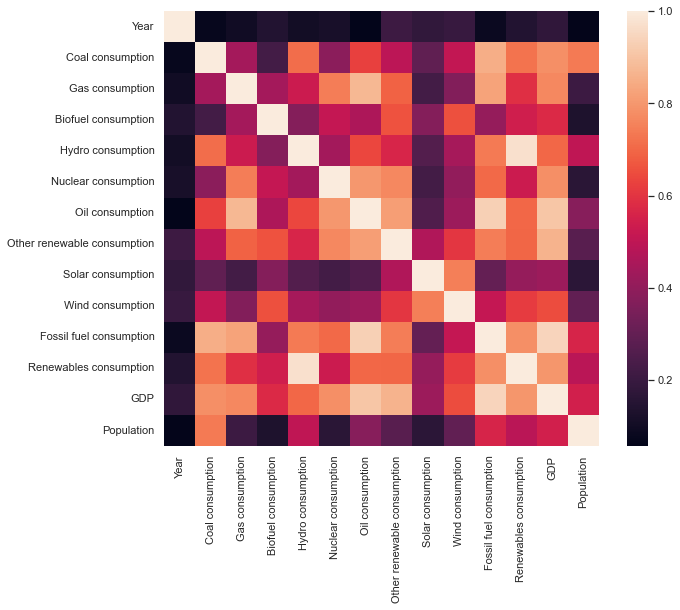

In [717]:
# Correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, square=True)

In [718]:
df_country_gdp = df[['Country','GDP', 'Population']].loc[df["Year"] == 2016].copy()
df_country_gdp = df_country_gdp.sort_values(by="GDP")

In [681]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

gdp_groupped = pd.cut(df.GDP, bins = [0, 10**11, 10**12, 10**13, 10**14],
                      labels=["0 - 0.1 bln $", "0.1 - 1 bln $", "1 - 10 bln $", "10 - 100 bln $"], ordered=True)
population_groupped = pd.cut(df.Population, bins = [0, 10**6, 10**7, 10**8, 10**9, 10**10],
                      labels=["0 - 1 000 000", "1 000 000 - 10 000 000",
                              "10 000 000 - 100 000 000", "100 000 000 - 1 000 000 000",
                              "1 000 000 000 - 10 000 000 000"], ordered=True)
years_groupped = pd.cut(df.Year, bins = [1969, 1980, 1990, 2000, 2010, 2020],
                      labels=[ "1970 - 1980", "1980 - 1990", "1990 - 2000",
                              "2000 - 2010", "2010 - 2020"], ordered=True)

df.insert(len(df.columns),"GDP groupped", gdp_groupped)
df.insert(len(df.columns),"Population groupped", population_groupped)
df.insert(len(df.columns),"Decade", years_groupped)

# to group countries by their GDP and population in 2016
for country in df["Country"].unique():
    df.loc[df.Country == country, "GDP groupped"] = \
    df["GDP groupped"].loc[(df["Country"]== country) & (df["Year"] == 2016)].item()

    df.loc[df.Country == country, "Population groupped"] = \
    df["Population groupped"].loc[(df["Country"]== country) & (df["Year"] == 2016)].item()

In [711]:
fig = df["Population groupped"].loc[df["Year"] == 2016].value_counts(
    sort=False).plot(kind="bar", title="Population distribution")
fig.update_layout(yaxis_title="Number of countries", xaxis_title="Population group")
fig.show()

<Figure size 432x288 with 0 Axes>

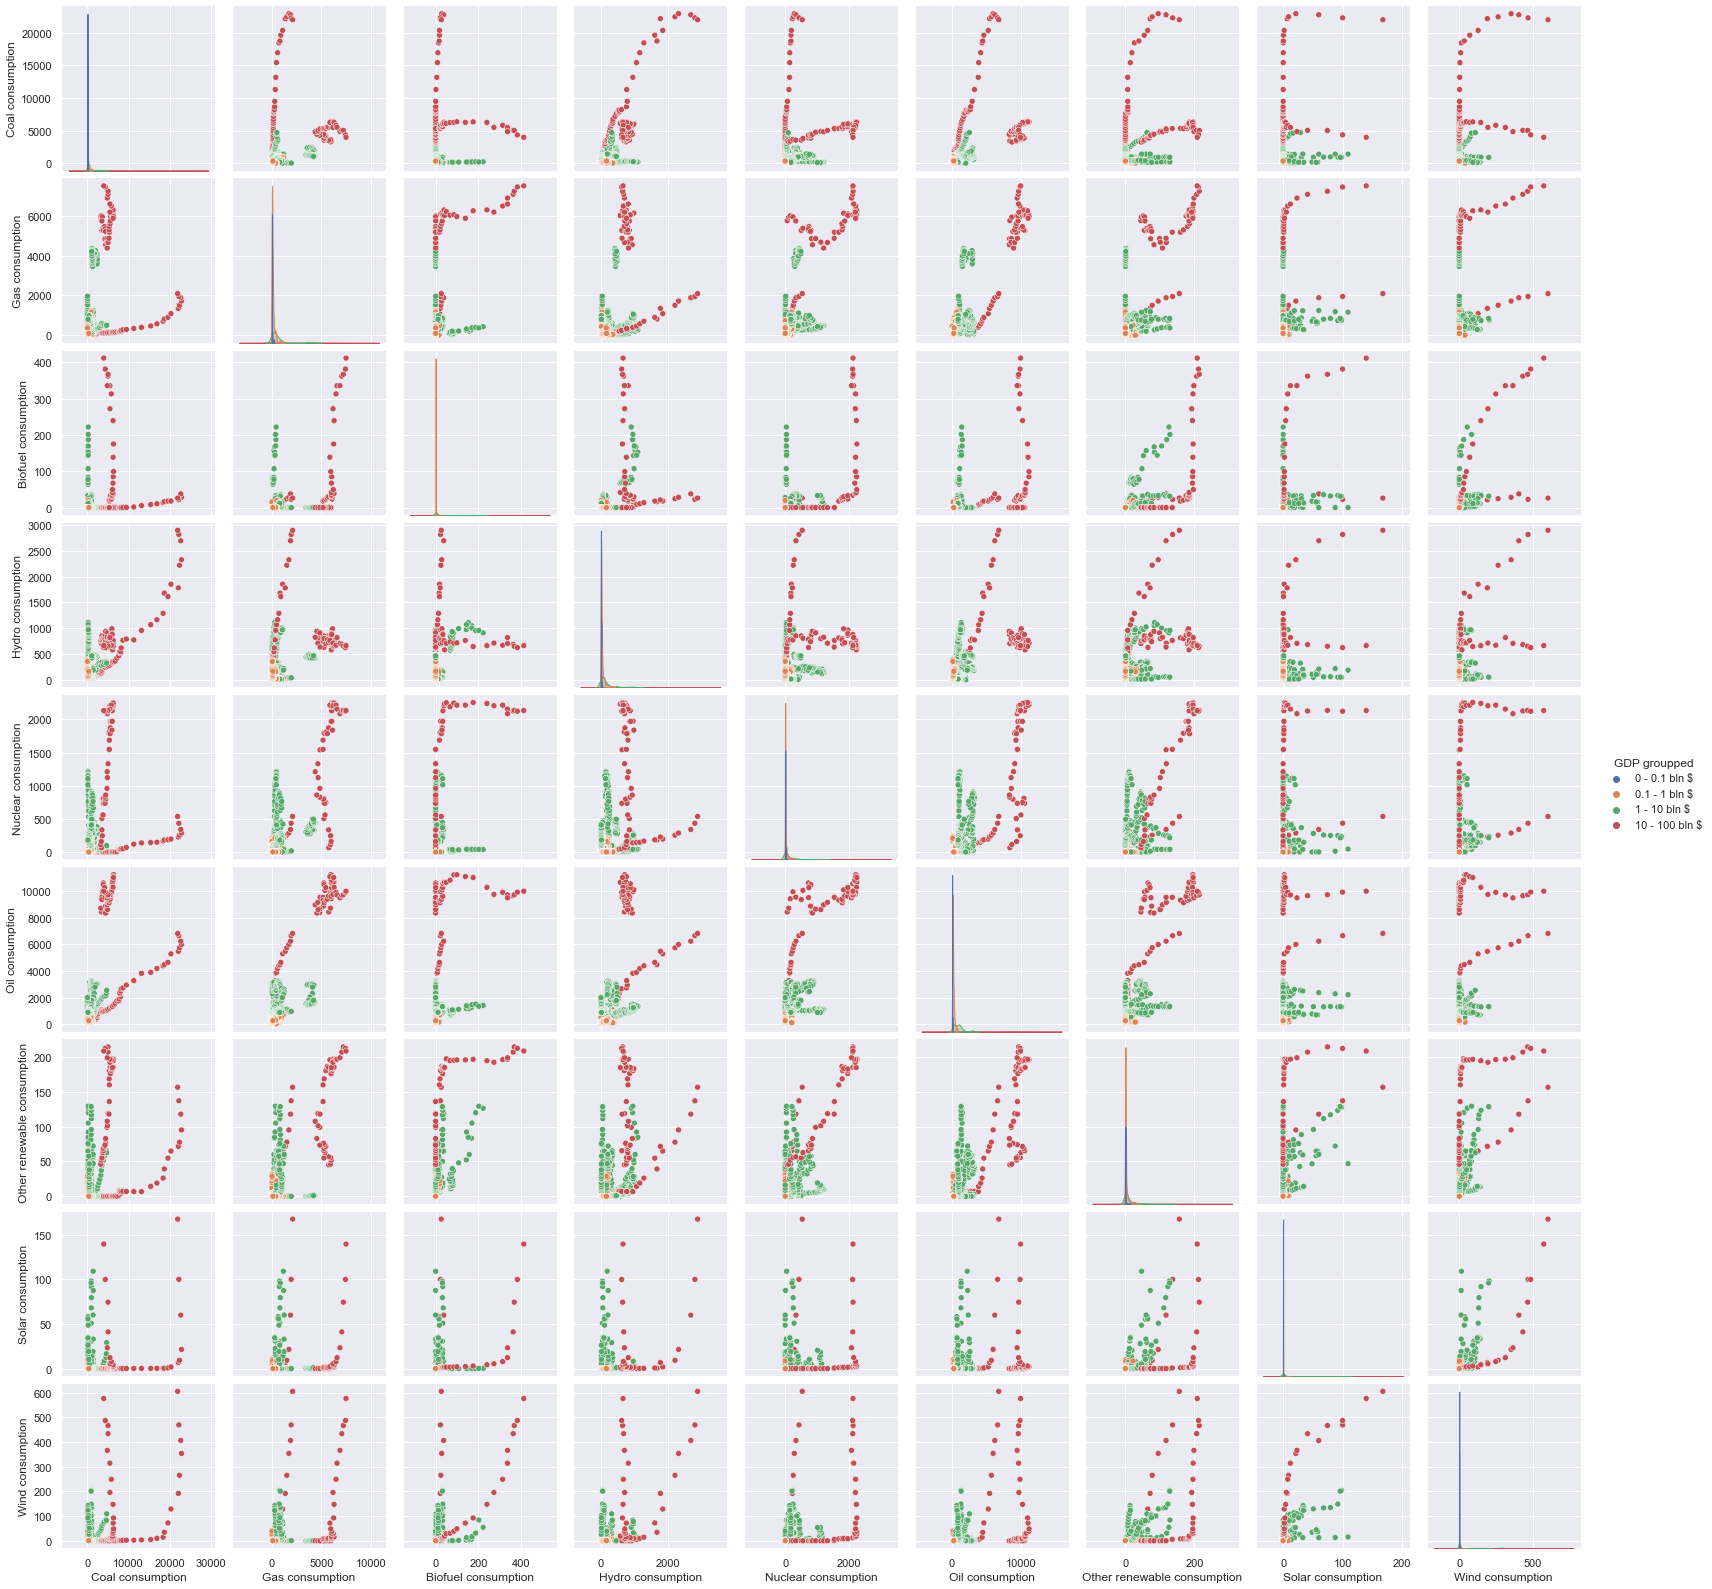

<Figure size 432x288 with 0 Axes>

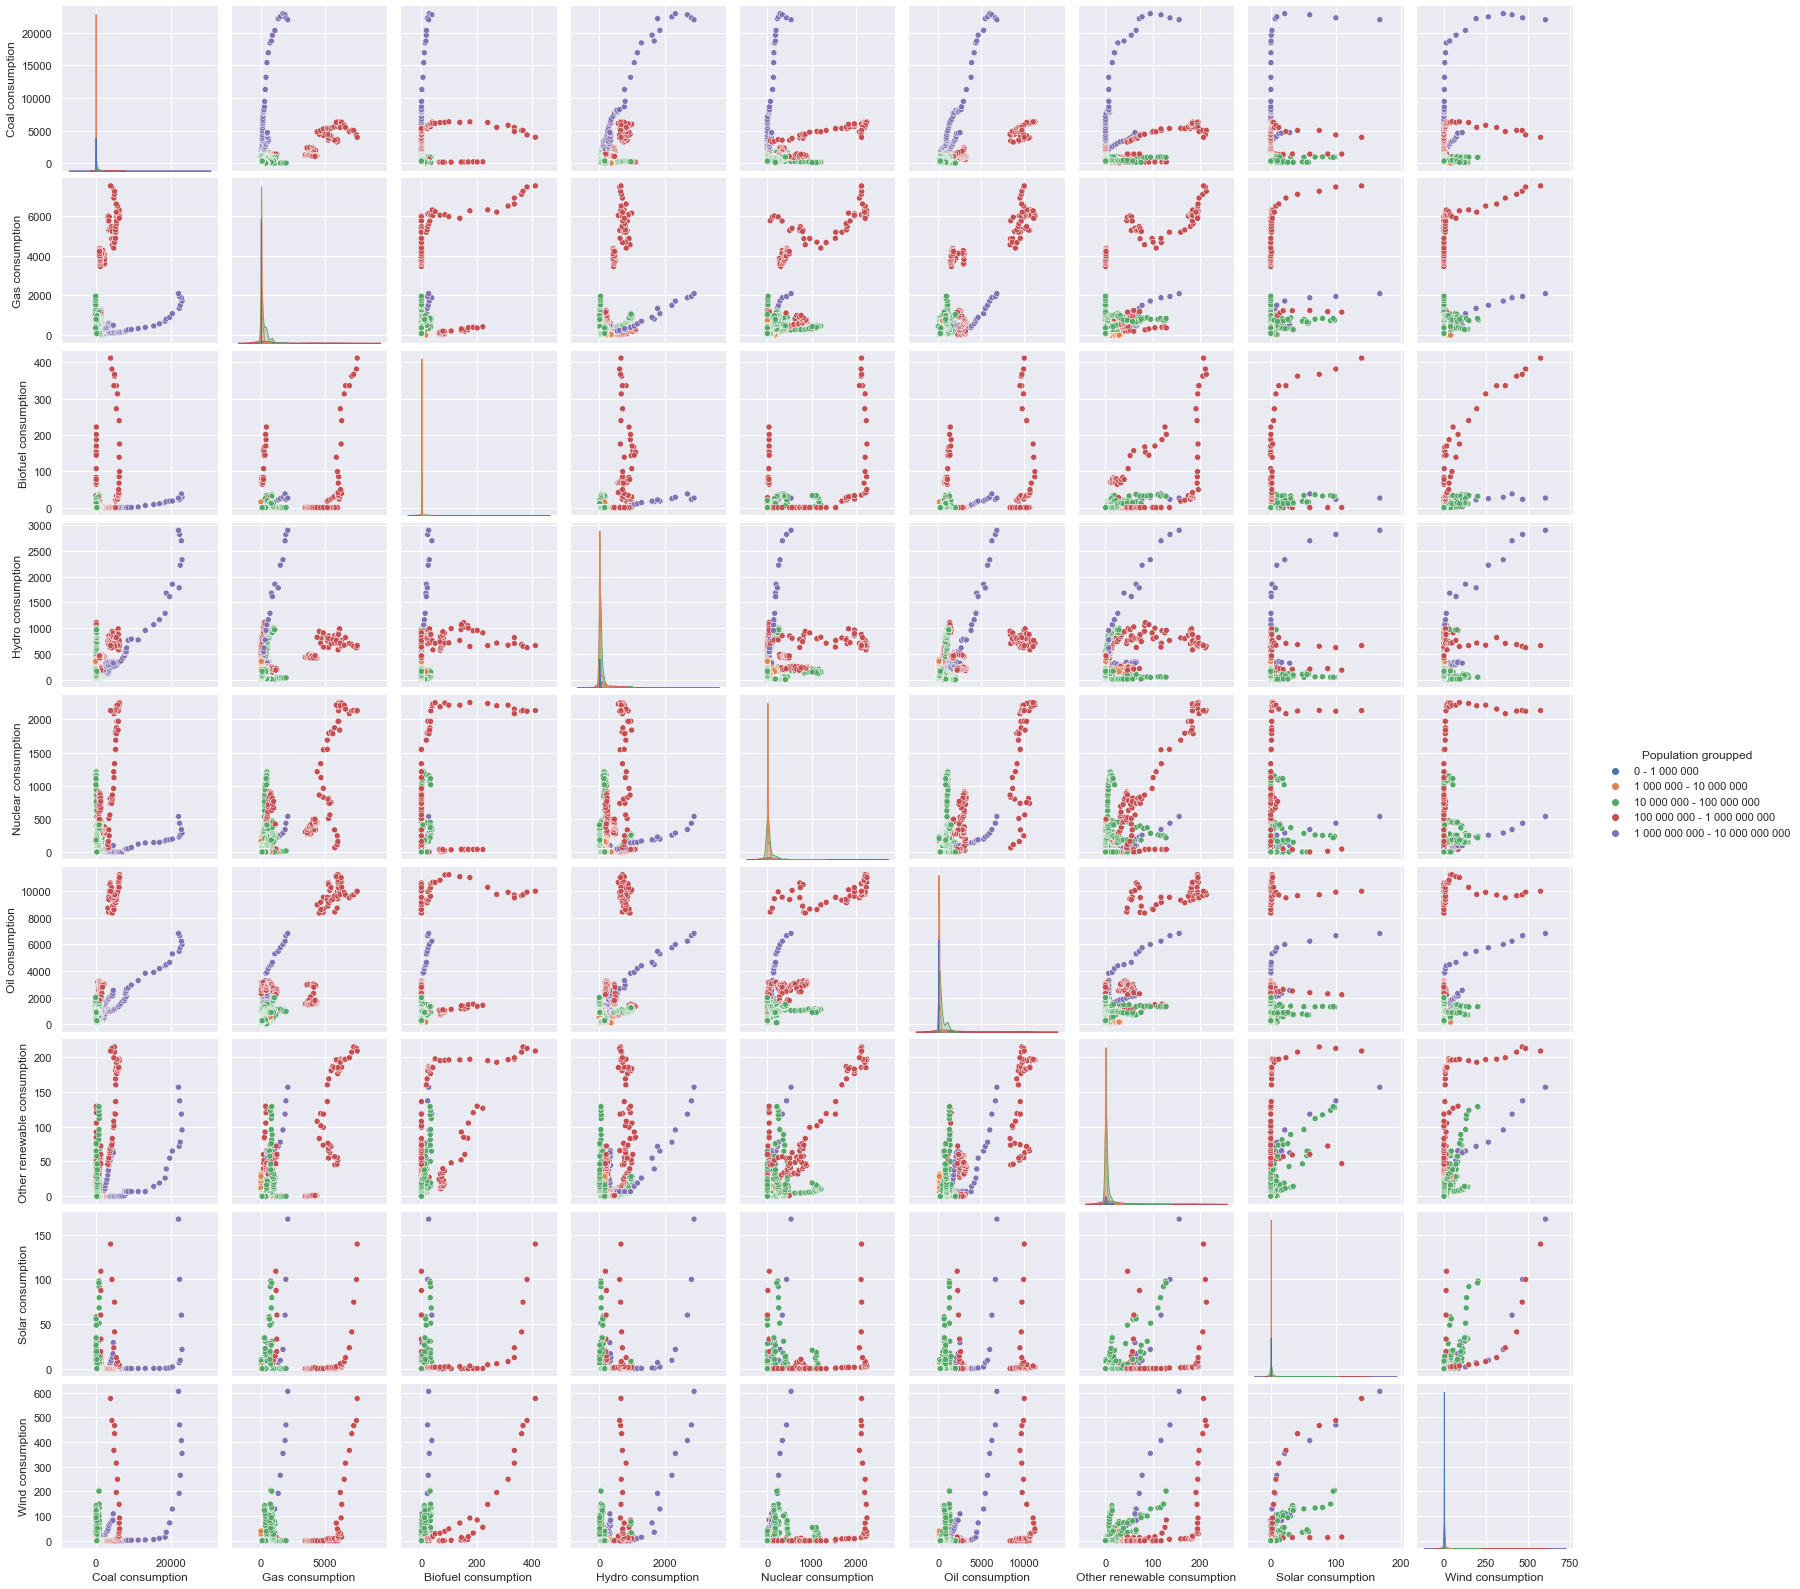

<Figure size 432x288 with 0 Axes>

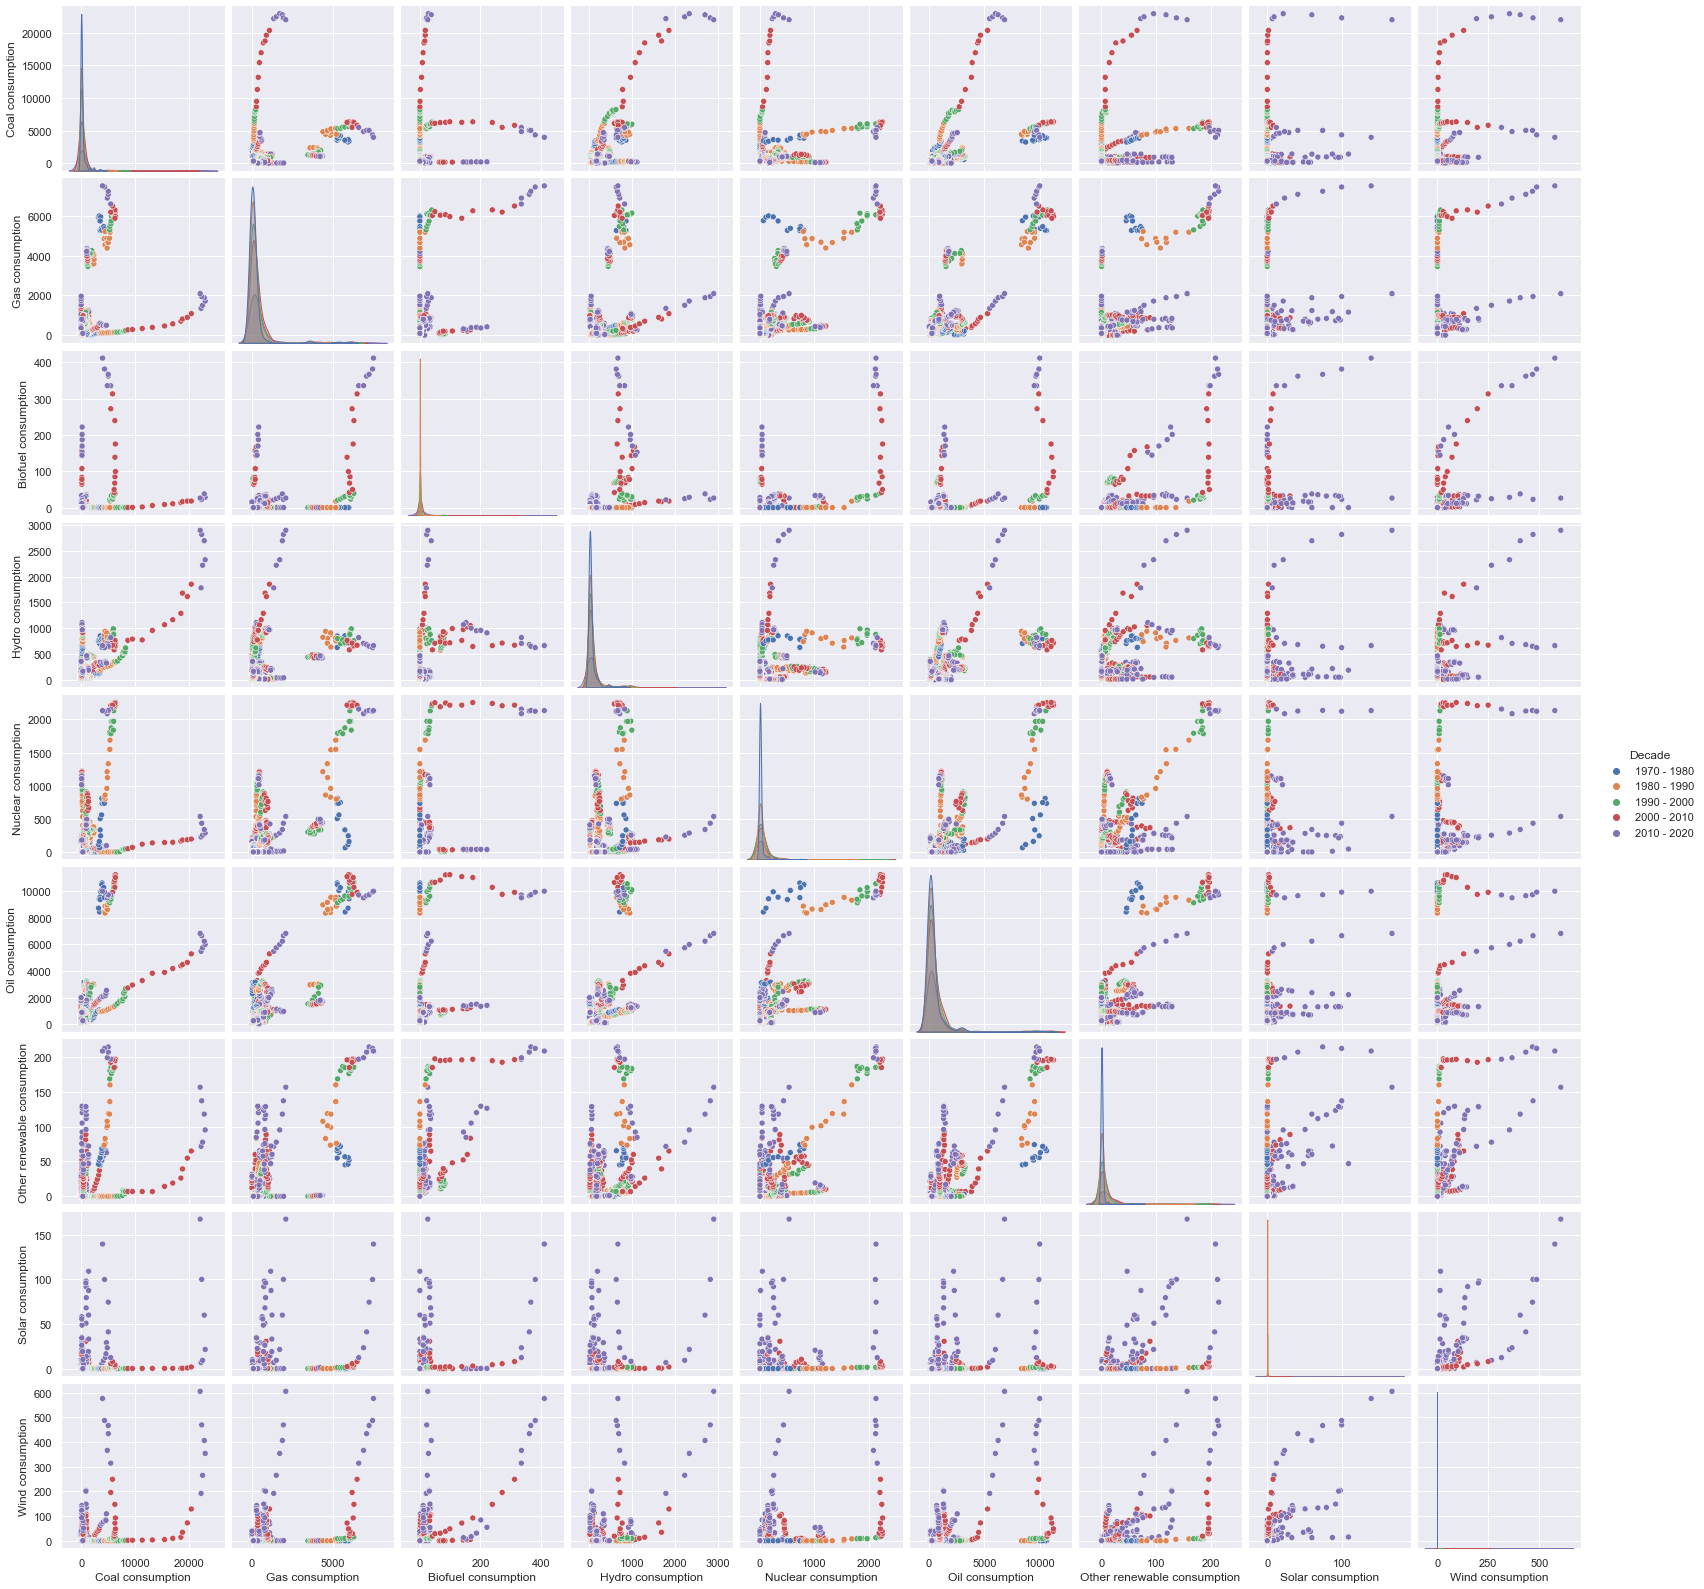

In [683]:
cat_col = ['GDP groupped', 'Population groupped', 'Decade']

for col in cat_col:
    sns.set()
    cols = [ "Coal consumption", "Gas consumption", "Biofuel consumption",
        "Hydro consumption", "Nuclear consumption", "Oil consumption",
        "Other renewable consumption",
        "Solar consumption", "Wind consumption"]
    df_sns = df[cat_col+cols]
    plt.figure()
    sns.pairplot(df_sns, hue=col)
    plt.show()

In [684]:
df = df.sort_values(by="GDP groupped")
energy_type_consumption= "Coal consumption"
decade = "2000 - 2010"
df_decade = df.loc[df["Decade"] == decade]
for value in df_decade["Population groupped"].unique():
    fig = px.box(df_decade.loc[df_decade['Population groupped'] == value],  x="Population groupped",
                 y=energy_type_consumption, color='GDP groupped',
             title="Distribution of "+energy_type_consumption.lower()+" by population and GDP in "+decade)
    fig.update_layout(yaxis_title=energy_type_consumption+" in TWh")
    fig.show()

In [685]:
energy_type_consumption = "Hydro consumption"+" growth"
starting_year = 1990
df_growth = df.iloc[0:0]
df_growth = df_growth.drop(columns=['Year', 'Decade'])
for country in df["Country"].unique():
    first_row = df.loc[(df["Country"]== country) & (df["Year"] == 2016)]
    population_groupped = first_row["Population groupped"].item()
    gdp_groupped = first_row["GDP groupped"].item()
    first_row = first_row.drop(columns=['Country', 'Population groupped',
                                        'GDP groupped', 'Decade', 'Year'])
    first_row.reset_index(inplace=True)

    second_row = df.loc[(df['Country'] == country) & (df['Year'] == starting_year)]
    second_row = second_row.drop(columns=['Country', 'Population groupped',
                                          'GDP groupped', 'Decade', 'Year'])
    second_row.reset_index(inplace=True)
    row = (first_row - second_row)/second_row

    row["Country"] = country
    row["Population groupped"] = population_groupped
    row["GDP groupped"] = gdp_groupped

    df_growth = pd.concat([df_growth, row], ignore_index = True)

for column in df_growth:
    if "consumption" in column:
        df_growth.rename(columns={column:column+ " growth"}, inplace=True)

df_growth = df_growth.drop(columns=['index'])
df_growth = df_growth.sort_values(by=["GDP groupped", energy_type_consumption])
fig = px.box(df_growth, x="GDP groupped", y=energy_type_consumption, points="all",
             title=energy_type_consumption+" since "+str(starting_year)+" by GDP",
             color_discrete_sequence=['#007fff'], hover_name="Country", hover_data=[energy_type_consumption])

fig.update_yaxes(tickformat="%")
fig.show()

In [686]:
# darkyellow =['#9b870c']
# df_growth

In [687]:
df_population = df[["Population groupped","Coal consumption", "Gas consumption",
                    "Biofuel consumption", "Hydro consumption", "Nuclear consumption",
                    "Oil consumption", "Other renewable consumption", "Solar consumption",
                    "Wind consumption"]].copy()
df_population = df_population.groupby('Population groupped').sum()
df_population.sort_values(by="Population groupped")

for i in range(len(df_population)) :
    ef = pd.DataFrame({'labels': df_population.columns,'values': df_population.iloc[i]})
    ef.iplot(kind='pie',labels='labels',values='values',
         title='Total energy consumption in TWh for countries: '
         +str(df_population.index[i])+ " population", hole = 0.5)

In [688]:
decade = '2000 - 2010'

temp = df.iloc[0:0]
temp = temp.drop(columns=['Decade', 'Year'])

starting_year = int(decade[:4])
ending_year = int(decade[7:])

for country in df["Country"].unique():
    first_row = df.loc[(df['Country'] == country) & (df['Year'] == ending_year)]
    population_groupped = first_row["Population groupped"].item()
    gdp_groupped = first_row["GDP groupped"].item()
    first_row = first_row.drop(columns=['Country', 'Population groupped',
                                        'GDP groupped', 'Decade', 'Year'])
    first_row.reset_index(inplace=True)

    second_row = df.loc[(df['Country'] == country) & (df['Year'] == starting_year)]
    second_row = second_row.drop(columns=['Country', 'Population groupped',
                                          'GDP groupped', 'Decade', 'Year'])
    second_row.reset_index(inplace=True)

    row = first_row - second_row
    row["Country"] = country
    row["Population groupped"] = population_groupped
    row["GDP groupped"] = gdp_groupped

    temp = pd.concat([temp, row], ignore_index = True)

pd.options.plotting.backend = "plotly"

In [689]:
df = df.sort_values(by=['Country', 'Year'])

energy_type_consumption = "Renewables consumption"
for gdp in sorted(df["GDP groupped"].unique()):
    fig = px.line(df.loc[(df["GDP groupped"] == gdp) & (df["Year"] >= 1985)],
                  x="Year", y=energy_type_consumption, color='Country',
                  title=energy_type_consumption+" in countries with GDP "+gdp)
    fig.update_layout(yaxis_title=energy_type_consumption+" in TWh")

    fig.show()



In [690]:
color_discrete_sequence = ['#48494b']*len(temp)
energy_type_consumption = "Oil consumption"
for item in temp["GDP groupped"].unique():
    fig = px.bar(temp[(temp["GDP groupped"] == item)].sort_values("Oil consumption", ascending=False),
                 x='Country', y=energy_type_consumption,
                 title=energy_type_consumption+" growth in "+decade+ " for GDP: "+item,
                 labels={'oil_consumption':'Growth in TWh', 'country': 'Country'},
                 color_discrete_sequence=color_discrete_sequence,width=900, height=600
    )
    fig.update_layout(yaxis_title=energy_type_consumption+" growth in TWh")
    fig.show()

In [691]:
## TODO
## Linear regression



countries = ["Poland", "Switzerland", "Egypt", "Russia", "USA", "China", "India"]
country = countries[0]
reg = LinearRegression().fit(df["Year"].loc[(df["Country"] == country)],
                             df["Renewables consumption"].loc[(df["Country"] == country)])


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
